# Single Variable Linear Regression



*   정의: sample data를 가장 잘 설명할 수있는 W,b를 찾는 Linear모델을 구현한다
*   f(x): wx+b, ex) w=0.2, b=1
* loss_function: Mean Squared Error 1/n * sum((f(x) - y)^2)
* gradient함수: 중앙차분, loss_function(w+h) - loss_function(w-h) / (2*h)
- gradient_update: w = w - learning_rate * dE/dw



In [1]:
import numpy as np
x_data = np.array([1.0,2.0,3.0,4.0,5.0]).reshape(5,1)
y_data = np.array([2.0,3.0,4.0,5.0,6.0]).reshape(5,1)

In [2]:
import matplotlib.pyplot as plt


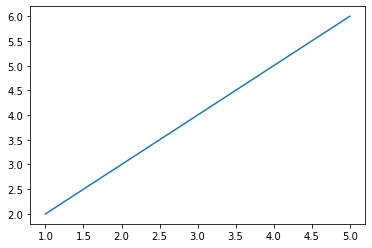

In [3]:
plt.plot(x_data,y_data)

In [4]:
weights = np.random.rand(1,1)
bias = np.random.rand(1)

In [5]:
weights

array([[0.41344794]])

In [6]:
bias

array([0.2542185])

In [7]:
def func1(x, weight, bias):
   return  weights*x +bias #np.dot(weights, x)+bias #Single-variable 함수 w1x1 + b


In [8]:
func1(x_data, weights, bias)


array([[0.66766644],
       [1.08111439],
       [1.49456233],
       [1.90801027],
       [2.32145821]])

In [9]:
def loss_function2(f, weights, bias, input_data, target):
  #MSE = 1/n * sum((f(X) - target)^2)
  total_list = []
  for idx in range(len(target)):
    predicted = f(input_data[idx], weights, bias)
    loss = (predicted - target[idx])**2
    total_list.append(loss)
    #print(loss)
  return sum(total_list) / len(target)


In [10]:
def loss_function(f, weights, bias, input_data, target):
  #이부분을 구현하시오
  #MSE = 1/n * sum((f(x) - target)^2)
  return (1/len(input_data))* sum((f(input_data, weights, bias) - target)**2)

In [11]:
f = func1
mse = loss_function(f, weights, bias, x_data, y_data)

In [12]:
mse

array([6.96530457])

In [13]:
mse2 = loss_function2(f, weights, bias, x_data, y_data)

In [14]:
mse2

array([[6.96530457]])

In [15]:
mse = loss_function

In [23]:
def gradient(f, weights, bias, lf, input_data, y_data, grad_name):
    #코드를 구현해 보세요
    h = 10e-4
    if grad_name == "weight":
      forward = lf(f, weights+h, bias, input_data, y_data)
      backward= lf(f, weights-h, bias, input_data, y_data)
      return (forward - backward) / (2*h)
    else:
      forward = lf(f, weights, bias+h, input_data, y_data)
      backward= lf(f, weights, bias-h, input_data, y_data)
      return (forward - backward) / (2*h)


In [24]:
gradient(f, weights, bias, mse, x_data, y_data, grad_name="weight")

[6.96530457]
[6.96530457]


array([0.])

In [25]:
def update(learning_rate, grad_w, grad_b, weights, bias):
  weights = weights - learning_rate*grad_w
  bias = bias - learning_rate*grad_b

  return weights, bias

In [26]:
f = func1
mse = loss_function

for iix in range(1000):
  print("weights :", weights, "bias :", bias)
  grad_w = gradient(f, weights, bias, mse, x_data, y_data, "weights")
  grad_b = gradient(f, weights, bias, mse, x_data, y_data, "bias")
  weights, bias = update(0.0001, grad_w, grad_b, weights, bias)


weights : [[0.41344794]] bias : [0.2542185]
weights : [[0.41394903]] bias : [0.25471959]
weights : [[0.41444971]] bias : [0.25522028]
weights : [[0.41495]] bias : [0.25572056]
weights : [[0.41544989]] bias : [0.25622045]
weights : [[0.41594937]] bias : [0.25671994]
weights : [[0.41644846]] bias : [0.25721902]
weights : [[0.41694715]] bias : [0.25771771]
weights : [[0.41744543]] bias : [0.258216]
weights : [[0.41794332]] bias : [0.25871389]
weights : [[0.41844082]] bias : [0.25921138]
weights : [[0.41893791]] bias : [0.25970847]
weights : [[0.4194346]] bias : [0.26020517]
weights : [[0.4199309]] bias : [0.26070147]
weights : [[0.4204268]] bias : [0.26119737]
weights : [[0.42092231]] bias : [0.26169287]
weights : [[0.42141742]] bias : [0.26218798]
weights : [[0.42191213]] bias : [0.26268269]
weights : [[0.42240644]] bias : [0.26317701]
weights : [[0.42290036]] bias : [0.26367093]
weights : [[0.42339389]] bias : [0.26416445]
weights : [[0.42388702]] bias : [0.26465758]
weights : [[0.42437